In [77]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

In [2]:
# add the csv files as dataframes
city_file = "Resources/City_data.csv"
ride_file = "Resources/Ride_Data.csv"
city_df = pd.read_csv(city_file)
ride_df = pd.read_csv(ride_file)

In [3]:
complete_df = pd.merge(ride_df,city_df,how = "left", on = ["city"])
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          2375 non-null   object 
 1   date          2375 non-null   object 
 2   fare          2375 non-null   float64
 3   ride_id       2375 non-null   int64  
 4   driver_count  2375 non-null   int64  
 5   type          2375 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 129.9+ KB


In [7]:
# Create Dataframes for different city types
urban_df = complete_df[complete_df["type"] == "Urban"]
suburban_df = complete_df[complete_df["type"] == "Suburban"]
rural_df = complete_df[complete_df["type"] == "Rural"]

In [20]:
#statistics by city'

# get the average rides per city
urban_rides_by_city = urban_df.groupby(["city"]).count()["ride_id"]
suburban_rides_by_city = suburban_df.groupby(["city"]).count()["ride_id"]
rural_rides_by_city = rural_df.groupby(["city"]).count()["ride_id"]

# Get the mean cost by city
urban_cost_by_city = urban_df.groupby(["city"]).mean()["fare"]
suburban_cost_by_city = suburban_df.groupby(["city"]).mean()["fare"]
rural_cost_by_city = rural_df.groupby(["city"]).mean()["fare"]

# driver count by city
urban_driver_count = urban_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_df.groupby(["city"]).mean()["driver_count"]


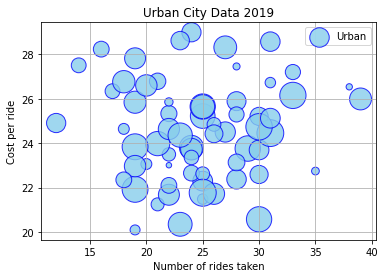

In [34]:
#Create a scatter plot for urban citys
# x = number of rides y = cost fo ride size = number of drivers per city

plt.scatter(urban_rides_by_city,urban_cost_by_city,s = 10*urban_driver_count,color = "skyblue",edgecolor = "blue", linewidths=1,alpha=0.8,label = "Urban")
plt.title("Urban City Data 2019")
plt.xlabel("Number of rides taken")
plt.ylabel("Cost per ride")
plt.grid(True)
plt.legend()

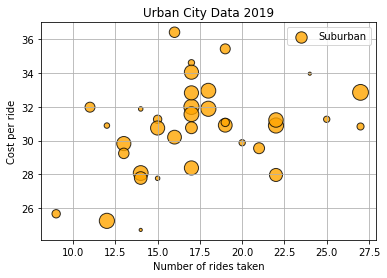

In [36]:
# Create a scatter plot for suburban areas
plt.scatter(suburban_rides_by_city,suburban_cost_by_city,s = 10*suburban_driver_count,color = "orange",edgecolor = "black", linewidths=1,alpha=0.8,label = "Suburban")
plt.title("suburban City Data 2019")
plt.xlabel("Number of rides taken")
plt.ylabel("Cost per ride")
plt.grid(True)
plt.legend()

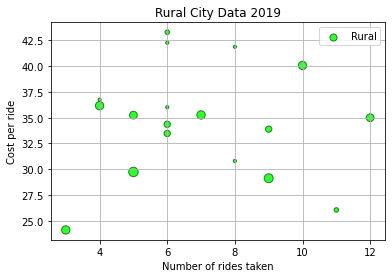

In [40]:
#Creating a scatter plot for rural areas
plt.scatter(rural_rides_by_city,rural_cost_by_city,s = 10*rural_driver_count,color = "lime",edgecolor = "darkgreen", linewidths=1,alpha=0.8,label = "Rural")
plt.title("Rural City Data 2019")
plt.xlabel("Number of rides taken")
plt.ylabel("Cost per ride")
plt.grid(True)
plt.legend()

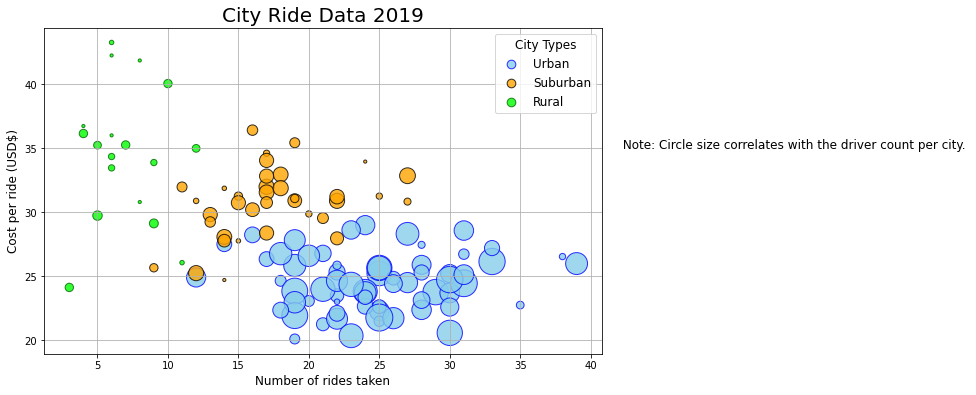

In [146]:
# Creating a plot with all the data
plt.subplots(figsize = (10,6))
#Create a plot for urban areas
plt.scatter(urban_rides_by_city,urban_cost_by_city,s = 10*urban_driver_count,color = "skyblue",edgecolor = "blue", linewidths=1,alpha=0.8,label = "Urban")
# Create a scatter plot for suburban areas
plt.scatter(suburban_rides_by_city,suburban_cost_by_city,s = 10*suburban_driver_count,color = "orange",edgecolor = "black", linewidths=1,alpha=0.8,label = "Suburban")
#Creating a scatter plot for rural areas
plt.scatter(rural_rides_by_city,rural_cost_by_city,s = 10*rural_driver_count,color = "lime",edgecolor = "darkgreen", linewidths=1,alpha=0.8,label = "Rural")

plt.title("City Ride Data 2019",fontsize = 20)
plt.xlabel("Number of rides taken",fontsize = 12)
plt.ylabel("Cost per ride (USD$)",fontsize=12)
plt.grid(True)

# create the ledgend

lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
plt.text(42,35," Note: Circle size correlates with the driver count per city. ", fontsize="12")
plt.savefig("Analysis/Fig1")

In [67]:
suburban_rides_by_city.mode()

0    17
dtype: int64

In [79]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_rides_by_city = np.mean(urban_rides_by_city)
print(f"The mean for the ride counts for urban trips is {mean_urban_rides_by_city:.2f}.")

median_urban_rides_by_city = np.median(urban_rides_by_city)
print(f"The median for the ride counts for urban trips is {median_urban_rides_by_city}.")

mode_urban_rides_by_city = sts.mode(urban_rides_by_city)
print(f"The mode for the ride counts for urban trips is {mode_urban_rides_by_city}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [80]:
sts.mode(rural_rides_by_city)

ModeResult(mode=array([6], dtype=int64), count=array([5]))

In [83]:
urban_fares = urban_df["fare"]
suburban_fares = suburban_df["fare"]
rural_fares = rural_df["fare"]

In [98]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

# Calculate the measures of central tendency for the average fare for the urban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

# Calculate the measures of central tendency for the average fare for the urban cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).
The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).
The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [96]:
# Calculating the mean median and mode drivers per city type

urban_mean_drivers = np.mean(urban_df["driver_count"])
print(f"The mean number of drivers for an urban city {urban_mean_drivers:.2f}.")
urban_median_drivers = np.median(urban_df["driver_count"])
print(f"The median number of drivers for an urban city {urban_median_drivers:.2f}.")
urban_mode_drivers = sts.mode(urban_df["driver_count"])
print(f"the urban drivers mode is {urban_mode_drivers}.")

suburban_mean_drivers = np.mean(suburban_df["driver_count"])
print(f"The mean number of drivers for an suburban city {urban_mean_drivers:.2f}.")
suburban_median_drivers = np.median(suburban_df["driver_count"])
print(f"The median number of drivers for an suburban city {urban_median_drivers:.2f}.")
suburban_mode_drivers = sts.mode(suburban_df["driver_count"])
print(f"the suburban drivers mode is {suburban_mode_drivers}.")

rural_mean_drivers = np.mean(rural_df["driver_count"])
print(f"The mean number of drivers for an suburban city {rural_mean_drivers:.2f}.")
rural_median_drivers = np.median(rural_df["driver_count"])
print(f"The median number of drivers for an suburban city {rural_median_drivers:.2f}.")
rural_mode_drivers = sts.mode(rural_df["driver_count"])
print(f"the urban drivers mode is {rural_mode_drivers}.")

The mean number of drivers for an urban city 36.68.
The median number of drivers for an urban city 37.00.
the urban drivers mode is ModeResult(mode=array([39], dtype=int64), count=array([86])).
The mean number of drivers for an suburban city 36.68.
The median number of drivers for an suburban city 37.00.
the suburban drivers mode is ModeResult(mode=array([20], dtype=int64), count=array([79])).
The mean number of drivers for an suburban city 4.30.
The median number of drivers for an suburban city 4.00.
the urban drivers mode is ModeResult(mode=array([1], dtype=int64), count=array([32])).


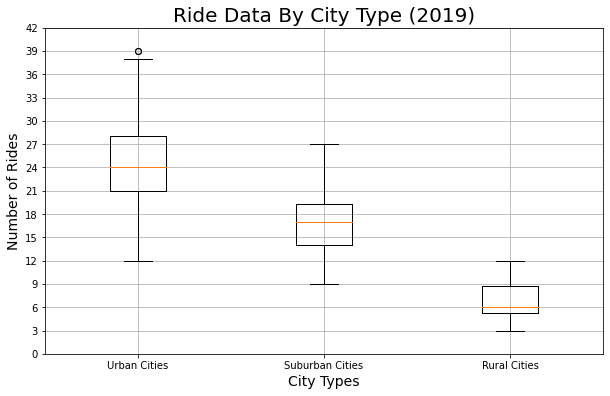

In [145]:
# Create a box-and-whisker plot for the cities ride count.
urban_rides_by_city.describe()
ride_count_data = [urban_rides_by_city , suburban_rides_by_city, rural_rides_by_city]
plt.subplots(figsize = (10,6))
plt.boxplot(ride_count_data)
plt.title("Ride Data By City Type (2019)",fontsize = 20)
plt.ylabel('Number of Rides',fontsize=14)
plt.xlabel("City Types",fontsize=14)
plt.boxplot(ride_count_data, labels=["Urban Cities","Suburban Cities", "Rural Cities"])
plt.xticks(ticks = [1,2,3],labels=["Urban Cities","Suburban Cities", "Rural Cities"])
plt.yticks(np.arange(0, 45, step=3.0))
plt.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

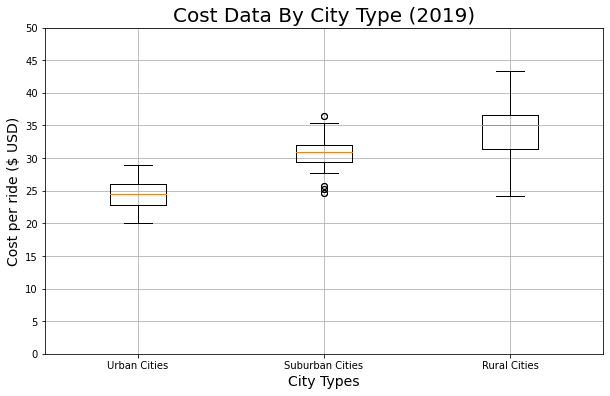

In [151]:
# Create a box-and-whisker plot for the cities ride farew.

cost_data = [urban_cost_by_city , suburban_cost_by_city, rural_cost_by_city]
plt.subplots(figsize = (10,6))
plt.boxplot(cost_data)
plt.title("Cost Data By City Type (2019)",fontsize = 20)
plt.ylabel('Cost per ride ($ USD)',fontsize=14)
plt.xlabel("City Types",fontsize=14)
plt.boxplot(cost_data, labels=["Urban Cities","Suburban Cities", "Rural Cities"])
plt.xticks(ticks = [1,2,3],labels=["Urban Cities","Suburban Cities", "Rural Cities"])
plt.yticks(np.arange(0, 51, step=5.0))
plt.grid()
# Save the figure.
plt.savefig("analysis/Fig3.png")
plt.show()

In [152]:
urban_cost_by_city.describe()

count    66.000000
mean     24.499122
std       2.190653
min      20.093158
25%      22.799102
50%      24.476732
75%      25.965357
max      28.993750
Name: fare, dtype: float64